In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = sns.load_dataset('mpg').dropna()

# Select two features and the target
X = df[['horsepower', 'weight']].values #why no reshape(-1,1)?
y = df['mpg'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients and intercept
w1, w2 = model.coef_
b = model.intercept_
print(f"Equation: mpg = {w1:.2f}*horsepower + {w2:.2f}*weight + {b:.2f}")

Equation: mpg = -0.05*horsepower + -0.01*weight + 46.59


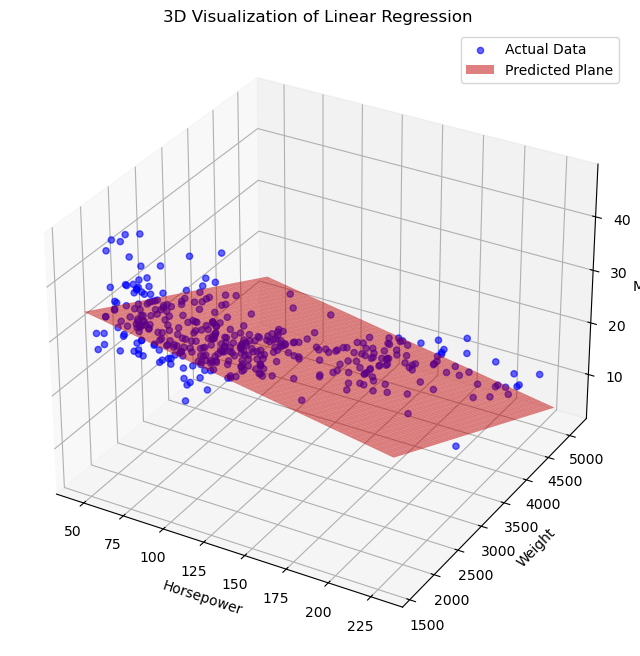

In [9]:
# Create a mesh grid for 3D visualization
horsepower_range = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 50)
weight_range = np.linspace(df['weight'].min(), df['weight'].max(), 50)
horsepower_grid, weight_grid = np.meshgrid(horsepower_range, weight_range)

# Predict mpg for the grid points
mpg_grid = model.predict(np.c_[horsepower_grid.ravel(), weight_grid.ravel()]).reshape(horsepower_grid.shape)

# Plot the data and the predicted plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter the actual data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual Data', alpha=0.6)

# Plot the predicted plane
ax.plot_surface(horsepower_grid, weight_grid, mpg_grid, color='red', alpha=0.5, label='Predicted Plane')

# Label the axes
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('3D Visualization of Linear Regression')

# Add a legend
plt.legend()
plt.show()

ויזואליזציה של מורד הגרדיאנט

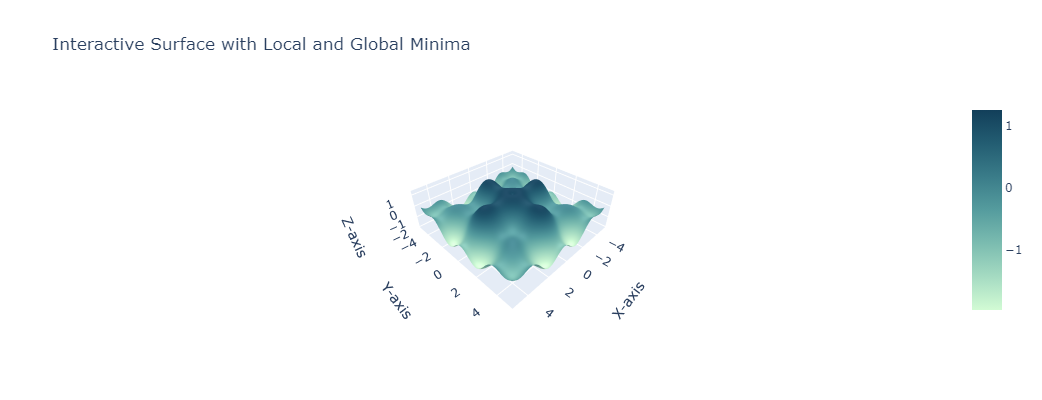

In [10]:
import plotly.graph_objects as go

# Define the function with local and global minima
def complex_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2)) + 0.5 * np.cos(2 * x) + 0.5 * np.cos(2 * y)

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values for the function
Z = complex_function(X, Y)

# Create an interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='darkmint')])

# Add layout details
fig.update_layout(
    title="Interactive Surface with Local and Global Minima",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="Z-axis",
    ),
    width=500,  # Width in pixels
    height=400,  # Height in pixels

)

# Show the interactive plot
fig.show()  


#### Gradient Descent "under thr hood"

In [11]:
#some were already imported, but just so we have t all in one place
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #NEW!!
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# Load the MPG dataset
mpg = sns.load_dataset('mpg')

# Choose only the 'horsepower' feature for visualization
mpg = mpg.dropna()
X = mpg[['horsepower']]
y = mpg['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
y_train.shape
X_train_scaled.shape

(313, 1)

In [14]:
###vectors

In [15]:
a= np.array([1,2,3])
b= 5* a
print(f"b type is {type(b)}\nb value is {b}")

b type is <class 'numpy.ndarray'>
b value is [ 5 10 15]


In [16]:
a= np.array([1,2,3])
c= np.array([2,3,4])
b= c* a
print(f"b type is {type(b)}\nb value is {b}")

b type is <class 'numpy.ndarray'>
b value is [ 2  6 12]


In [17]:
a= np.array([1,2,3])
c= np.array([2,3,4])
b= np.dot(a,c)
print(f"b type is {type(b)}\nb value is {b}")

b type is <class 'numpy.int32'>
b value is 20


In [18]:
a= np.array([[1,2,3],[4,5,6]])
c= np.array([[7,8],[9,10],[11,12]])
b= np.dot(a,c)
print(f"b shape is {b.shape}\n {b}")

b shape is (2, 2)
 [[ 58  64]
 [139 154]]


In [19]:
a= np.array([[1,2],[3,4],[5,6]])
c= np.array([[7,8],[9,10],[11,12]]).T
b= np.dot(a,c)
print(f"b shape is {b.shape}\n {b}")

b shape is (3, 3)
 [[ 23  29  35]
 [ 53  67  81]
 [ 83 105 127]]
